In [44]:
import random
#from mlxtend.evaluate import bias_variance_decomp
from scipy import stats
from pandas.core.common import random_state
from sklearn.metrics import mean_squared_error
import mlxtend.evaluate as evu
from numpy.random import seed
from numpy.random import normal
import numpy as np
from collections import Counter
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import math
import statistics
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
plt.rcParams['figure.figsize'] = 10, 8
import statistics

In [45]:
#function to create data for ks test and ecdf
def create_data(i):
  #np.random.seed(i)
  rng = np.random.default_rng(seed=i)
  mean = [0, 0,0,0,0,0, 0,0,0,0]
  cov = [[0.2, 0,0,0,0,0,0,0,0,0], [0, 0.2,0,0,0,0,0,0,0,0],[0, 0,0.2,0,0,0,0,0,0,0],[0, 0,0,0.2,0,0,0,0,0,0],[0, 0,0,0,0.2,0,0,0,0,0],
        [0, 0,0,0,0,0.2,0,0,0,0],[0, 0,0,0,0,0,0.2,0,0,0],[0, 0,0,0,0,0,0,0.2,0,0],[0, 0,0,0,0,0,0,0,0.2,0],[0, 0,0,0,0,0,0,0,0,0.2]]
  x= rng.multivariate_normal(mean, cov, 200)

  mean2 = [8, 8,8,8,8,8, 8,8,8,8] #
  cov2 = [[0.2, 0,0,0,0,0,0,0,0,0], [0, 0.2,0,0,0,0,0,0,0,0],[0, 0,0.2,0,0,0,0,0,0,0],[0, 0,0,0.2,0,0,0,0,0,0],[0, 0,0,0,0.2,0,0,0,0,0],
        [0, 0,0,0,0,0.2,0,0,0,0],[0, 0,0,0,0,0,0.2,0,0,0],[0, 0,0,0,0,0,0,0.2,0,0],[0, 0,0,0,0,0,0,0,0.2,0],[0, 0,0,0,0,0,0,0,0,0.2]]
  x2= rng.multivariate_normal(mean2, cov2, 200)

  r_data = pd.DataFrame(x,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
  r_data2 = pd.DataFrame(x2,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
  r_data=r_data.abs()
  r_data2=r_data2.abs()
  list1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  r_data['t']=r_data['x1']+r_data['x2']+(r_data['x3']*rng.choice(list1))+(r_data['x4']*rng.choice(list1))+(r_data['x5']*rng.choice(list1))+rng.normal(0, 4, 1)
  r_data['treatment']=1
  r_data2['t']=r_data2['x1']+r_data2['x2']+(r_data2['x3']*rng.choice(list1))+(r_data2['x4']*rng.choice(list1))+(r_data2['x5']*rng.choice(list1))+rng.normal(0, 4, 1)
  r_data2['treatment']=0
  data=pd.concat([r_data,r_data2])
  return data


In [46]:
#function to create data for standardized difference
def create_data2(i):
  #np.random.seed(i)
  rng = np.random.default_rng(i)
  mean = [0, 0,0,0,0,0, 0,0,0,0]
  cov = [[0.2, 0,0,0,0,0,0,0,0,0], [0, 0.2,0,0,0,0,0,0,0,0],[0, 0,0.2,0,0,0,0,0,0,0],[0, 0,0,0.2,0,0,0,0,0,0],[0, 0,0,0,0.2,0,0,0,0,0],
        [0, 0,0,0,0,0.2,0,0,0,0],[0, 0,0,0,0,0,0.2,0,0,0],[0, 0,0,0,0,0,0,0.2,0,0],[0, 0,0,0,0,0,0,0,0.2,0],[0, 0,0,0,0,0,0,0,0,0.2]]
  x= rng.multivariate_normal(mean, cov, 200)

  mean2 = [0.6, 0.6,0.6,0.6,0.6,0.6,0.6, 0.6,0.6,0.6]
  cov2 = [[0.2, 0,0,0,0,0,0,0,0,0], [0, 0.2,0,0,0,0,0,0,0,0],[0, 0,0.2,0,0,0,0,0,0,0],[0, 0,0,0.2,0,0,0,0,0,0],[0, 0,0,0,0.2,0,0,0,0,0],
        [0, 0,0,0,0,0.2,0,0,0,0],[0, 0,0,0,0,0,0.2,0,0,0],[0, 0,0,0,0,0,0,0.2,0,0],[0, 0,0,0,0,0,0,0,0.2,0],[0, 0,0,0,0,0,0,0,0,0.2]]
  x2= rng.multivariate_normal(mean2, cov2, 200)

  r_data = pd.DataFrame(x,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
  r_data2 = pd.DataFrame(x2,columns=['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10'])
  r_data=r_data.abs()
  r_data2=r_data2.abs()
  list1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
  r_data['t']=r_data['x1']+r_data['x2']+(r_data['x3']*rng.choice(list1))+(r_data['x4']*rng.choice(list1))+(r_data['x5']*rng.choice(list1))+rng.normal(0, 4, 1)
  r_data['treatment']=1
  r_data2['t']=r_data2['x1']+r_data2['x2']+(r_data2['x3']*rng.choice(list1))+(r_data2['x4']*rng.choice(list1))+(r_data2['x5']*rng.choice(list1))+rng.normal(0, 4, 1)
  r_data2['treatment']=0
  data=pd.concat([r_data,r_data2])
  return data


In [47]:
#function to calculate ks test
def ks_w2(data1, data2, wei1, wei2):
    ix1 = np.argsort(data1)
    ix2 = np.argsort(data2)
    data1 = data1[ix1]
    data2 = data2[ix2]
    wei1 = wei1[ix1]
    wei2 = wei2[ix2]
    data = np.concatenate([data1, data2])
    cwei1 = np.hstack([0, np.cumsum(wei1) / sum(wei1)])
    cwei2 = np.hstack([0, np.cumsum(wei2) / sum(wei2)])
    cdf1we = cwei1[[np.searchsorted(data1, data,side='right')]]
    cdf2we = cwei2[[np.searchsorted(data2, data,side='right')]]
    return np.max(np.abs(cdf1we - cdf2we))

In [48]:
#function to calculate ks test p-value
def ks_w2_p(data1, data2, wei1, wei2):
    ix1 = np.argsort(data1)
    ix2 = np.argsort(data2)
    data1 = data1[ix1]
    data2 = data2[ix2]
    wei1 = wei1[ix1]
    wei2 = wei2[ix2]
    data = np.concatenate([data1, data2])
    cwei1 = np.hstack([0, np.cumsum(wei1) / sum(wei1)])
    cwei2 = np.hstack([0, np.cumsum(wei2) / sum(wei2)])
    cdf1we = cwei1[[np.searchsorted(data1, data, side='right')]]
    cdf2we = cwei2[[np.searchsorted(data2, data, side='right')]]
    a=stats.ttest_ind(a=cdf1we, b=cdf2we, equal_var=False)
    return a[1]

In [49]:
#function to calculate weights for IPW
def normal_prop(y_pred,y_test):
    prop_score=[]
    nom=normal_prop_2(np.array(y_test.reshape(-1)))
    #sigma=np.var((y_test - y_pred))
    sigma=statistics.variance(y_pred)
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    for i in range(len(y_pred)):
      prop_score.append(p * np.exp(-( y_test[i]- y_pred[i])**2)/(2*math.pi*sigma**2))
    #print(sigma)

    return np.array(prop_score)

In [50]:
#Utility function to calculate weights for IPW
def normal_prop_2(y_test):
    prop_score=[]
    #sigma=np.var((y_test - y_pred))
    sigma=statistics.variance(y_test)
    p = 1 / math.sqrt(2 * math.pi * sigma**2)
    for i in range(len(y_test)):
      prop_score.append(p * np.exp(-( y_test[i]- np.mean(y_test))**2)/(2*math.pi*sigma**2))
    #print(sigma)
    return np.array(prop_score)

In [51]:
#Function to calculate CV
cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100

In [52]:
#Function to perform ks test with p-value
data_probs=pd.DataFrame()
list_of_p_os = []
list_of_p_ipw = []
list_of_p_unw = []
for i in range(10):
  list_of_p_os.append([])
  list_of_p_ipw.append([])
  list_of_p_unw.append([])

cv_weight=[]
cv_ipw=[]

feat=['x1', 'x2', 'x3', 'x4', 'x5', 'x6','x7', 'x8', 'x9', 'x10']
def ks_cal(model_type):
  data2=create_data2(4)
  KS_weights=np.zeros(10)
  KS_ipw=np.zeros(10)
  KS_unw=np.zeros(10)
  cv_of_weight=0
  cv_of_ipw=0
  x_data2=data2
  y_data2=data2.iloc[:,10:11]
  for i in range(200):
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.15, random_state=i)
    
    if(model_type==0):
       regressor=SVR(kernel='linear',max_iter=5)
    elif(model_type==1):
        regressor =  linear_model.LinearRegression()
    else:
        regressor=SVR(kernel='rbf',C=1000)

    x_traint_t=x_train2.iloc[:,0:10]
    regressor.fit(x_traint_t,y_train2)
    #regressor=SVR(kernel='linear').fit(x_train,y_train)
    y_pred=regressor.predict(x_test2.iloc[:,0:10])
    #y_pred_ipw=y_pred
    #y_pred_ipw['t']=y_test2
    prop_ipw=normal_prop(np.array(y_pred.reshape(-1)),np.array(y_test2))
    x_test2['weights']=np.abs((x_test2['t'].values)-(np.array(y_pred).squeeze() ))
    x_test2['ipw']=(prop_ipw)
    #data['treatment'] = np.random.randint(0, 1, data.shape[0])
    data_treat=x_test2[x_test2['treatment']==1]
    data_control=x_test2[x_test2['treatment']==0]
    treat_weights=np.array(data_treat['weights'])
    control_weights=np.array(data_control['weights'])
    treat_ipw=np.array(data_treat['ipw'])
    control_ipw=np.array(data_control['ipw'])
    weightsn=np.array(x_test2['weights'])
    invweightsn=np.array(x_test2['ipw'])
    cv_of_weight=cv_of_weight+cv(weightsn)
    cv_of_ipw=cv_of_ipw+cv(invweightsn)
    cv_weight.append(cv_of_weight/i)
    cv_ipw.append(cv_of_ipw/i)

    ind=0
    for k in feat:

        KS_weights[ind]=KS_weights[ind]+ks_w2(np.array(data_treat[k]),np.array(data_control[k]),treat_weights,control_weights)
        list_of_p_os[ind].append(ks_w2_p(np.array(data_treat[k]),np.array(data_control[k]),treat_weights,control_weights))
        KS_ipw[ind]=KS_ipw[ind]+ks_w2(np.array(data_treat[k]),np.array(data_control[k]),treat_ipw,control_ipw)
        list_of_p_ipw[ind].append(ks_w2_p(np.array(data_treat[k]),np.array(data_control[k]),treat_ipw,control_ipw))
        treat_ones=np.ones(len(np.array(data_treat[k])))
        control_ones=np.ones(len(np.array(data_control[k])))
        #res=ks_2samp(np.array(data_treat[x]),np.array(data_control[x]))
        #KS_unw[ind]= KS_unw[ind]+res[0]
        KS_unw[ind]= KS_unw[ind]+ks_w2(np.array(data_treat[k]),np.array(data_control[k]),treat_ones,control_ones)
        list_of_p_unw[ind].append(ks_w2_p(np.array(data_treat[k]),np.array(data_control[k]),treat_ones,control_ones))

        ind=ind+1


  KS_weights=(KS_weights/200)
  KS_ipw=(KS_ipw/200)
  KS_unw=(KS_unw/200)
  return KS_weights,KS_ipw,KS_unw

In [53]:
#0 =underfit, 1=moderate, 2=overfit
model_type=1
KS_weights,KS_ipw,KS_unw=ks_cal(model_type)
if(model_type==0):
  typeis='underfit'
elif(model_type==1):
  typeis='good'
else:
  typeis='overfit'

print('K-S weights OS',KS_weights)
print('sum of K-S weights OS',sum(KS_weights))
print ('Percentage of p-vale>0.05 for all features')
print ('-----------------------------------------')
for i in range(10):
  count = sum(map(lambda x : x>0.05, list_of_p_os[i]))
  #print(len(list_of_p_os))
  print(count/len(list_of_p_os[i]))

<ipython-input-52-6bee55d0c620>:54: RuntimeWarning: divide by zero encountered in double_scalars
  cv_weight.append(cv_of_weight/i)
<ipython-input-52-6bee55d0c620>:55: RuntimeWarning: divide by zero encountered in double_scalars
  cv_ipw.append(cv_of_ipw/i)
<ipython-input-47-8266fcb1fa2c>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data,side='right')]]
<ipython-input-47-8266fcb1fa2c>:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data,side='right')]]
<i

K-S weights OS [0.36684392 0.33091596 0.33248959 0.36023546 0.34392556 0.3184363
 0.36160104 0.39332011 0.35225887 0.34572728]
sum of K-S weights OS 3.5057540981376842
Percentage of p-vale>0.05 for all features
-----------------------------------------
0.29
0.45
0.455
0.285
0.345
0.44
0.32
0.255
0.375
0.325


<ipython-input-47-8266fcb1fa2c>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf1we = cwei1[[np.searchsorted(data1, data,side='right')]]
<ipython-input-47-8266fcb1fa2c>:13: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cdf2we = cwei2[[np.searchsorted(data2, data,side='right')]]
<ipython-input-47-8266fcb1fa2c>:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will r

In [54]:
def get_keys(val,dic):
    list=[]
    for key, value in dic.items():
        if val == value:
           list.append(key)
    return list

In [55]:
testdata_size = {}
for i in range(1000):
  data2=create_data2(4)
  x_data2=data2
  y_data2=data2.iloc[:,10:11]
  x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.15, random_state=i)
  #x_test=x_test.copy()
  #x_test_n['treat']=y_test.values
  data_treat=x_test2[x_test2['treatment']==1]
  data_control=x_test2[x_test2['treatment']==0]
  testdata_size[i]=len(data_treat)
value, count = Counter(testdata_size.values()).most_common(1)[0]
list_of_seeds=get_keys(value,testdata_size)


In [56]:
#function to calculate ecdf
X_Result_treat=[]
Y_Result_treat=[]
X_Result_control=[]
Y_Result_control=[]
def ecdf_cal(scheme):
  for i in list_of_seeds:
    data2=create_data2(4)
    x_data2=data2
    y_data2=data2.iloc[:,10:11]
    x_train2, x_test2, y_train2, y_test2 = train_test_split(x_data2, y_data2, test_size=0.15, random_state=i)
    regressor =  linear_model.LinearRegression()
    #regressor =  linear_model.SGDRegressor()
    x_traint_t=x_train2.iloc[:,0:10]
    regressor.fit(x_traint_t,y_train2)
    #regressor=SVR(kernel='linear').fit(x_train,y_train)
    y_pred = regressor.predict(x_test2.iloc[:,0:10])
    #x_test_n=x_test.copy()
    #x_test['treat']=y_test.values
    prop_ipw=normal_prop(np.array(y_pred.reshape(-1)),np.array(y_test2))
    x_test2['weights']=np.abs((x_test2['t'].values)-(np.array(y_pred).squeeze() ))
    x_test2['ipw']=(prop_ipw)
    #data['treatment'] = np.random.randint(0, 1, data.shape[0])
    data_treat=x_test2[x_test2['treatment']==1]
    data_control=x_test2[x_test2['treatment']==0]
    treat_weights=np.array(data_treat['weights'])
    control_weights=np.array(data_control['weights'])
    treat_ipw=np.array(data_treat['ipw'])
    control_ipw=np.array(data_control['ipw'])
    feature_treat_x=[]
    feature_treat_y=[]
    feature_control_x=[]
    feature_control_y=[]
    for x in feat:
        if(scheme==0):
          sns.ecdfplot(data=data_treat,y=x,weights=treat_weights )
          sns.ecdfplot(data=data_control,y=x,weights=control_weights)
        elif(scheme==1):
          sns.ecdfplot(data=data_treat,y=x,weights=treat_ipw )
          sns.ecdfplot(data=data_control,y=x,weights=control_ipw)
        else:
          sns.ecdfplot(data=data_treat,y=x)
          sns.ecdfplot(data=data_control,y=x)

        ax = plt.gca()
        treat = ax.lines[0]
        control=ax.lines[1]
        #x_data=treat.get_xdata()
        feature_treat_x.append(treat.get_xdata())
        feature_treat_y.append(treat.get_ydata())
        feature_control_x.append(control.get_xdata())
        feature_control_y.append(control.get_ydata())
        plt.close()
    X_Result_treat.append(feature_treat_x)
    Y_Result_treat.append(feature_treat_y)
    X_Result_control.append(feature_control_x)
    Y_Result_control.append(feature_control_y)


In [67]:
# OS=0, IPW=1, unweighted=2
scheme=0
ecdf_cal(scheme)
if(scheme==0):
  typeis='Our scheme'
elif(scheme==1):
  typeis='IPW'
else:
  typeis='Without weights'

X_Result_treat_avg=[]
Y_Result_treat_avg=[]
X_Result_control_avg=[]
Y_Result_control_avg=[]

for i in range(0,10):
  column = i
  X_Result_treat_avg.append(sum(row[column] for row in X_Result_treat)/len(list_of_seeds))
  Y_Result_treat_avg.append(sum(row[column] for row in Y_Result_treat)/len(list_of_seeds))
  X_Result_control_avg.append(sum(row[column] for row in X_Result_control)/len(list_of_seeds))
  Y_Result_control_avg.append(sum(row[column] for row in Y_Result_control)/len(list_of_seeds))

Text(0.5, 1.0, 'ECDF weighted (Our scheme) on x1')

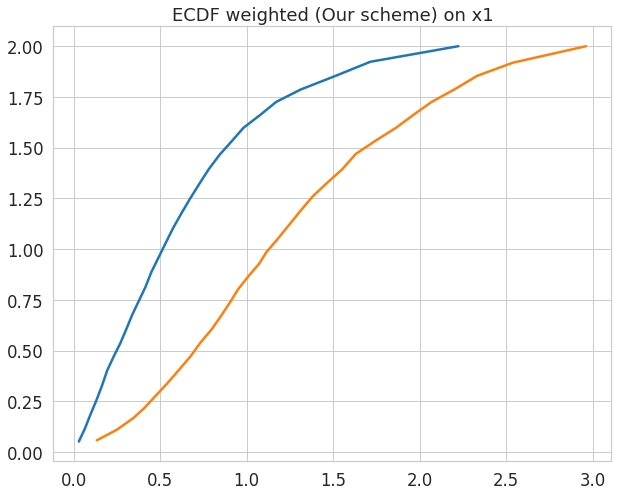

In [68]:
#printing ecdf plts for features
plt.plot(Y_Result_treat_avg[0],X_Result_treat_avg[0])
plt.plot(Y_Result_control_avg[0],X_Result_control_avg[0])
plt.title('ECDF weighted ('+typeis +') on x1')

Text(0.5, 1.0, 'ECDF weighted (Our scheme) on x2')

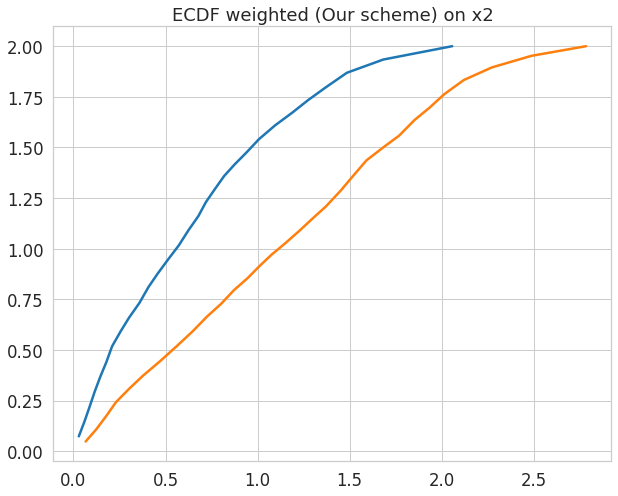

In [69]:
plt.plot(Y_Result_treat_avg[1],X_Result_treat_avg[1])
plt.plot(Y_Result_control_avg[1],X_Result_control_avg[1])
plt.title('ECDF weighted ('+typeis +') on x2')

Text(0.5, 1.0, 'ECDF weighted (Our scheme) on x3')

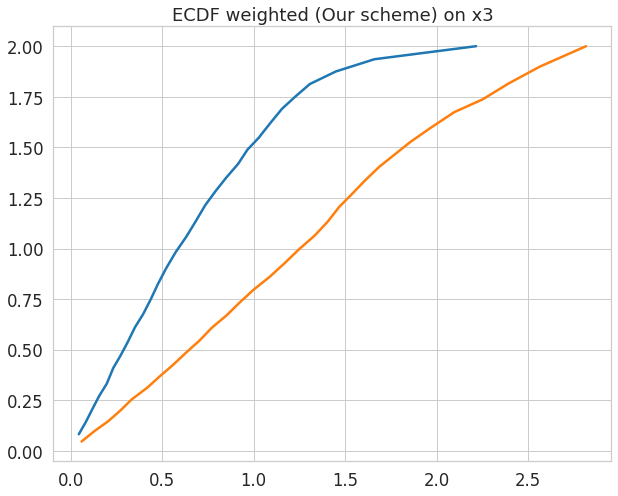

In [70]:
plt.plot(Y_Result_treat_avg[2],X_Result_treat_avg[2])
plt.plot(Y_Result_control_avg[2],X_Result_control_avg[2])
plt.title('ECDF weighted ('+typeis +') on x3')

Text(0.5, 1.0, 'ECDF weighted (Our scheme) on x4')

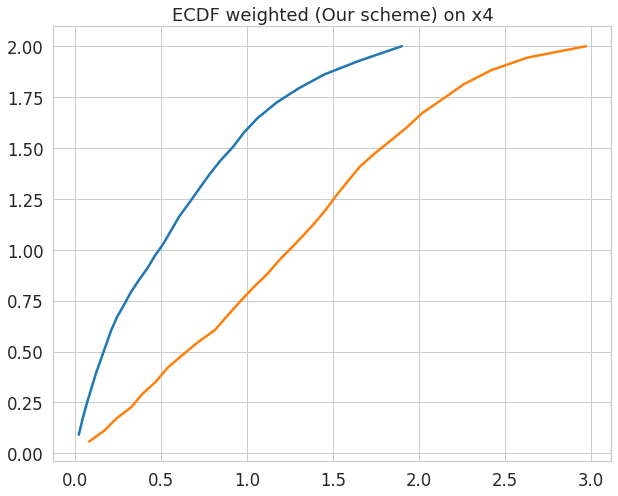

In [71]:
plt.plot(Y_Result_treat_avg[3],X_Result_treat_avg[3])
plt.plot(Y_Result_control_avg[3],X_Result_control_avg[3])
plt.title('ECDF weighted ('+typeis +') on x4')

Text(0.5, 1.0, 'ECDF weighted (Our scheme) on x5')

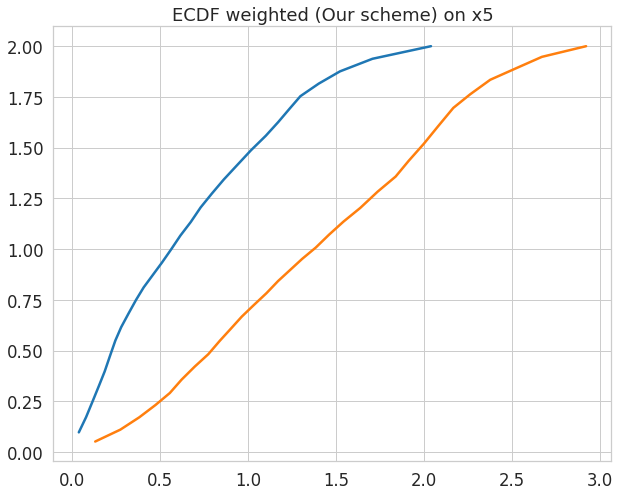

In [72]:
plt.plot(Y_Result_treat_avg[4],X_Result_treat_avg[4])
plt.plot(Y_Result_control_avg[4],X_Result_control_avg[4])
plt.title('ECDF weighted ('+typeis +') on x5')

In [63]:
#Data generation for the calculation of standardized difference
data=create_data(4)
x_data=data
y_data=data.iloc[:,10:11]

In [64]:
#functions to calculate standardized mean difference
def cal_SMD_Unweighted(x,unw):
  for i in range(200):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=i)

    if(model_type==0):
       regressor=SVR(kernel='linear',max_iter=5)
    elif(model_type==1):
        regressor =  linear_model.LinearRegression()
    else:
        regressor=SVR(kernel='rbf',C=1000)
    
    x_traint_t=x_train.iloc[:,0:10]
    regressor.fit(x_traint_t,y_train)
    #regressor=SVR(kernel='linear').fit(x_train,y_train)
    y_pred = regressor.predict(x_test.iloc[:,0:10])
    #x_test_n=x_test.copy()
    #x_test['treat']=y_test.values
    x_test['weights']=np.abs((x_test['t'].values)-(np.array(y_pred).squeeze() ))
    #data['treatment'] = np.random.randint(0, 1, data.shape[0])
    data_treat=x_test[x_test['treatment']==1]
    data_control=x_test[x_test['treatment']==0]
    data_treat[x].mean()
    data_control[x].mean()
    A=(data_treat[x].mean()-data_control[x].mean())
    B=math.sqrt((np.var(data_treat[x])+np.var(data_control[x]))/2)
    unw=unw+(100*(A/B))
    return (unw/200)

def cal_SMD_weighted(x, wtg):
  for i in range(200):

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=i)
    if(model_type==0):
       regressor=SVR(kernel='linear',max_iter=5)
    elif(model_type==1):
        regressor =  linear_model.LinearRegression()
    else:
        regressor=SVR(kernel='rbf',C=1000)
    x_traint_t=x_train.iloc[:,0:10]
    regressor.fit(x_traint_t,y_train)
    #regressor=SVR(kernel='linear').fit(x_train,y_train)
    y_pred = regressor.predict(x_test.iloc[:,0:10])
    #x_test_n=x_test.copy()
    #x_test['treat']=y_test.values
    x_test['weights']=np.abs((x_test['t'].values)-(np.array(y_pred).squeeze() ))
    #data['treatment'] = np.random.randint(0, 1, data.shape[0])
    data_treat=x_test[x_test['treatment']==1]
    data_control=x_test[x_test['treatment']==0]

    treat_mean=sum(data_treat[x]*data_treat['weights'])/sum(data_treat['weights'])
    control_mean=sum(data_control[x]*data_control['weights'])/sum(data_control['weights'])
    A=(treat_mean-control_mean)
    var_treat=(sum(data_treat['weights'])/((sum(data_treat['weights'])**2)-(sum(data_treat['weights']**2))))*sum((data_treat[x]-treat_mean)**2 *data_treat['weights'])
    var_control=(sum(data_control['weights'])/((sum(data_control['weights'])**2)-(sum(data_control['weights']**2))))*sum((data_control[x]-control_mean)**2 *data_control['weights'])
    B=math.sqrt((var_treat+var_control)/2)
    wtg=wtg+(100*(A/B))
    return (wtg/200)

def cal_SMD_weighted_ipw(x, wtgi):
  for i in range(200):

    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=i)
    if(model_type==0):
       regressor=SVR(kernel='linear',max_iter=5)
    elif(model_type==1):
        regressor =  linear_model.LinearRegression()
    else:
        regressor=SVR(kernel='rbf',C=1000)

    x_traint_t=x_train.iloc[:,0:10]
    regressor.fit(x_traint_t,y_train)
    #regressor=SVR(kernel='linear').fit(x_train,y_train)
    y_pred = regressor.predict(x_test.iloc[:,0:10])
    #x_test_n=x_test.copy()
    #x_test['treat']=y_test.values
    prop_ipw=normal_prop(np.array(y_pred.reshape(-1)),np.array(y_test2))
    x_test['weights']=np.abs((x_test['t'].values)-(np.array(y_pred).squeeze() ))
    x_test['ipw']=(prop_ipw)
    #data['treatment'] = np.random.randint(0, 1, data.shape[0])
    data_treat=x_test[x_test['treatment']==1]
    data_control=x_test[x_test['treatment']==0]



    treat_mean=sum(data_treat[x]*data_treat['ipw'])/sum(data_treat['ipw'])
    control_mean=sum(data_control[x]*data_control['ipw'])/sum(data_control['ipw'])
    A=(treat_mean-control_mean)
    var_treat=(sum(data_treat['ipw'])/((sum(data_treat['ipw'])**2)-(sum(data_treat['ipw']**2))))*sum((data_treat[x]-treat_mean)**2 *data_treat['ipw'])
    var_control=(sum(data_control['ipw'])/((sum(data_control['ipw'])**2)-(sum(data_control['ipw']**2))))*sum((data_control[x]-control_mean)**2 *data_control['ipw'])
    B=math.sqrt((var_treat+var_control)/2)
    wtgi=wtgi+(100*(A/B))
    return (wtgi/200)

In [65]:
SMD_weighted=[]
SMD_weighted_ipw=[]
SMD_unweighted=[]
unw=0
wtg=0
wtgi=0
for i in range(1,11):
  #col.append("x"+str(i))
  x='x'+str(i)
  #print (i)
  wtd=np.abs(cal_SMD_weighted(x,wtg))
  ipwwtd=np.abs(cal_SMD_weighted_ipw(x,wtgi))
  unwtd=np.abs(cal_SMD_Unweighted(x,unw))
  SMD_weighted.append(wtd)
  SMD_weighted_ipw.append(ipwwtd)
  SMD_unweighted.append(unwtd)

Text(0.5, 1.0, 'Standardized difference with our scheme')

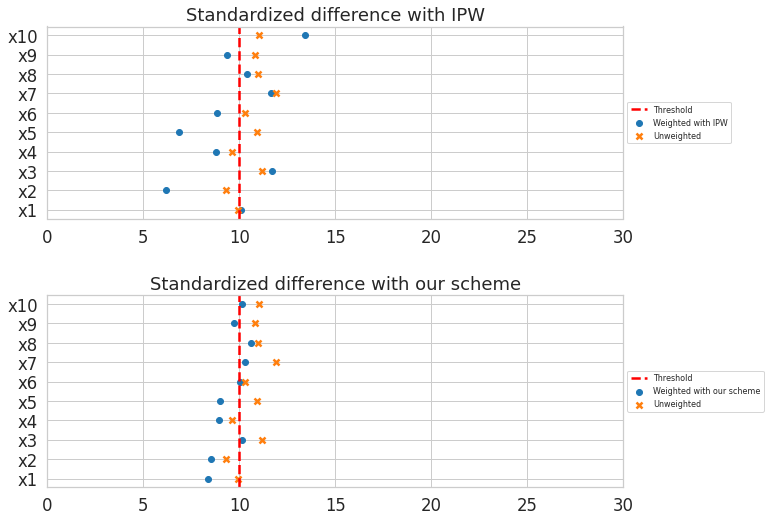

In [66]:
#plotting standardizd mean difference
variables = ["x1", "x2", "x3", "x4", "x5", "x6","x7", "x8", "x9", "x10"]
fig, axs = plt.subplots(2)
#fig.suptitle('Absolute Standardized Difference on IHDP')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



axs[0].scatter(SMD_weighted_ipw,variables, label='Weighted with IPW', marker='o')
axs[0].scatter(SMD_unweighted,variables, label='Unweighted', marker='x')
axs[0].axvline(10, linestyle='dashed',color='r', label='Threshold')
axs[0].legend(prop={'size': 8},loc='center left', bbox_to_anchor=(1, 0.5))
axs[0].set_xlim([0,30])
axs[0].set_title('Standardized difference with IPW')

axs[1].scatter(SMD_weighted,variables, label='Weighted with our scheme', marker='o')
axs[1].scatter(SMD_unweighted,variables, label='Unweighted', marker='x')
axs[1].axvline(10, linestyle='dashed',color='r', label='Threshold')
axs[1].legend(prop={'size': 8},loc='center left', bbox_to_anchor=(1, 0.5))
#axs[1].axis('equal')
axs[1].set_xlim([0,30])
axs[1].set_title('Standardized difference with our scheme')
